# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

In [73]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [74]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [75]:
seattle_data = pd.read_csv('seattle.txt', sep = '\t', header = 0)

In [76]:
seattle_data.shape

(100, 2)

In [77]:
seattle_data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [78]:
price2001 = seattle_data[seattle_data['Year']  == 2001].Price
price2002 = seattle_data[seattle_data['Year']  == 2002].Price

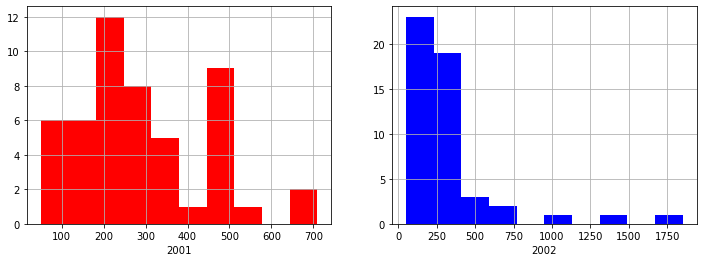

In [79]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(price2001, color = 'r')
pylab.xlabel('2001')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(price2002, color = 'b')
pylab.xlabel('2002')

pylab.show()

## Двухвыборочные критерии для независимых выборок

In [82]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2001))

95% confidence interval for the mean: [245.193581, 332.659499]


In [83]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2002))

95% confidence interval for the mean: [241.437946, 417.076334]


### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [84]:
stats.mannwhitneyu(price2001, price2002)

MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [85]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [91]:
index = range(20)
indices = set([tuple(index)])

In [92]:
indices

{(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)}

In [96]:
def get_random_combinations(n1, n2, max_combinations):
    index = np.arange(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [87]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

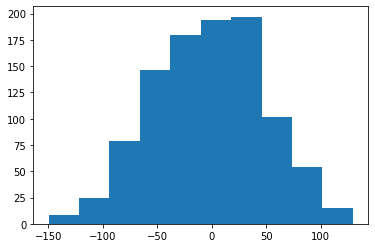

In [97]:
pylab.hist(permutation_zero_dist_ind(price2001, price2002, max_combinations = 1000))
pylab.show()

In [89]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [98]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 10000))

p-value: 0.444000


In [17]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations = 50000))

p-value: 0.443200


In [11]:
a = np.array([22,22,15,13,19,19,18,20,21,13,13,15])
b = np.array([17,18,18,15,12,4,14,15,10])
stats.mannwhitneyu(a, b, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

In [14]:
data = pd.read_csv('challenger.txt', sep='\t')

In [15]:
data

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0
5,Jun18.83,22.2,0
6,Aug30.83,22.8,0
7,Nov28.83,21.1,0
8,Feb03.84,13.9,1
9,Apr06.84,17.2,1


In [54]:
data[data.Incident==1].Temperature.values

array([21.1, 13.9, 17.2, 21.1, 11.7, 23.9, 14.4])

In [27]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [28]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [58]:
np.random.seed(0)
a = get_bootstrap_samples(data[data.Incident==1].Temperature.values, 1000)
b = get_bootstrap_samples(data[data.Incident==0].Temperature.values, 1000)

In [59]:
am = np.array([i.mean() for i in a])
bm = np.array([i.mean() for i in b])

In [60]:
stat_intervals(bm - am, 0.05)

array([1.45040179, 8.06457589])

In [65]:
np.random.seed(0)
a = get_bootstrap_samples(data[data.Incident==1].Temperature.values, 1000)
b = get_bootstrap_samples(data[data.Incident==0].Temperature.values, 1000)

In [66]:
a

array([[11.7, 23.9, 21.1, ..., 21.1, 21.1, 13.9],
       [21.1, 23.9, 17.2, ..., 14.4, 21.1, 21.1],
       [11.7, 17.2, 13.9, ..., 14.4, 21.1, 13.9],
       ...,
       [17.2, 21.1, 21.1, ..., 23.9, 11.7, 21.1],
       [13.9, 21.1, 23.9, ..., 14.4, 11.7, 17.2],
       [17.2, 13.9, 21.1, ..., 13.9, 14.4, 23.9]])

In [72]:
bm

array([21.7625 , 22.40625, 21.78125, 22.10625, 22.68125, 22.9125 ,
       22.1    , 21.61875, 21.575  , 22.15625, 21.03125, 23.06875,
       21.5875 , 22.4625 , 21.83125, 21.75   , 22.14375, 22.3125 ,
       22.04375, 21.85   , 23.84375, 22.35625, 21.725  , 22.5625 ,
       22.21875, 22.73125, 21.93125, 22.93125, 21.29375, 22.0375 ,
       21.14375, 22.7    , 22.35   , 21.13125, 21.425  , 23.0375 ,
       23.10625, 23.76875, 22.28125, 22.6125 , 21.13125, 21.85625,
       22.875  , 22.28125, 22.41875, 22.18125, 22.18125, 22.4875 ,
       21.575  , 23.33125, 21.55625, 21.48125, 22.06875, 22.975  ,
       21.425  , 23.04375, 22.38125, 22.9    , 23.4625 , 22.55   ,
       22.     , 23.21875, 22.20625, 22.275  , 22.75625, 22.45625,
       23.1125 , 22.14375, 21.975  , 22.65625, 22.9375 , 22.825  ,
       21.49375, 22.4125 , 21.55   , 22.3875 , 22.975  , 23.15625,
       22.51875, 22.41875, 23.1875 , 22.29375, 23.025  , 22.6625 ,
       22.4875 , 23.29375, 22.44375, 22.1125 , 21.73125, 22.48

In [104]:
np.random.seed(0)
permutation_test(a, b, max_permutations=10000)

IndexError: index 1725 is out of bounds for axis 0 with size 1000